In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,26,technician,married,secondary,no,289,no,no,cellular,8,jul,102,3,-1,0,unknown,1
20996,34,management,married,tertiary,no,122,yes,no,cellular,19,may,301,2,-1,0,unknown,0
20997,32,blue-collar,married,tertiary,yes,521,no,yes,telephone,2,oct,140,3,-1,0,unknown,0
20998,40,technician,married,secondary,no,2092,no,no,cellular,3,aug,7,2,-1,0,unknown,0


Age: Age of the customer <br>
Job: Type of job of customer<br>
Marital: Marital status of the customer<br>
Education: The education level of the customer<br>
Default: Has credit in default?<br>
Balance: Average yearly balance (in Euros)<br>
Housing: Has a housing loan?<br>
Loan: Has a personal loan?<br>
Contact: Contact communication type <br>
Day: Last contact day of the month<br>
Month: Last contact month of the year<br>
Duration: Last contact duration, in seconds<br>
Campaign: Number of contacts performed during this campaign and for this client<br>
Pdays: Number of days that passed by after the client was last contacted from a previous campaign (-1 means the client was not previously contacted)<br>
Previous: Number of contacts performed before this campaign and for this client<br>
Poutcome: Outcome of the previous marketing campaign<br>


### y - Has the customer subscribed to a term deposit?

The hackathon participants need to build a machine learning based model to predict the value of the target feature (whether a customer will subscribe to the plan or not) based on the given set of input features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        21000 non-null  int64 
 1   job        21000 non-null  object
 2   marital    21000 non-null  object
 3   education  21000 non-null  object
 4   default    21000 non-null  object
 5   balance    21000 non-null  int64 
 6   housing    21000 non-null  object
 7   loan       21000 non-null  object
 8   contact    21000 non-null  object
 9   day        21000 non-null  int64 
 10  month      21000 non-null  object
 11  duration   21000 non-null  int64 
 12  campaign   21000 non-null  int64 
 13  pdays      21000 non-null  int64 
 14  previous   21000 non-null  int64 
 15  poutcome   21000 non-null  object
 16  y_bool     21000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 2.7+ MB


In [5]:
df.shape


(21000, 17)

### Categorical data  : job, marital , education , default , housing , loan , contact , month , poutcome <br>
### Numerical data : age , day , balance , duration , campaign , pdays

### Descriptive Analysis

In [6]:
# for integer type 
df[['age','day','balance','duration','campaign','pdays','y_bool']].describe()

,age,day,balance,duration,campaign,pdays,y_bool
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,36.997952,11.056571,1607.497810,264.085048,2.013381,3.231952,0.269095
std,10.484725,7.450415,2991.187132,288.163812,1.575916,23.161489,0.443500
min,19.000000,1.000000,-2072.000000,4.000000,1.000000,-1.000000,0.000000
25%,29.000000,5.000000,299.000000,94.000000,1.000000,-1.000000,0.000000
50%,35.000000,10.000000,633.000000,184.000000,2.000000,-1.000000,0.000000
75%,45.000000,16.000000,1875.000000,319.000000,2.000000,-1.000000,1.000000
max,87.000000,31.000000,71188.000000,2703.000000,28.000000,437.000000,1.000000


In [7]:
#descriptive analysis for object type
df[['job','marital','education','default','housing','loan','contact','month','poutcome']].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,21000,21000,21000,21000,21000,21000,21000,21000,21000
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,jul,unknown
freq,4947,13412,10663,19994,11263,16215,13172,5011,16125


In [8]:
for i in df.columns:
    print(f'{i} : ',df[i].unique())

age :  [51 55 65 25 36 52 22 31 30 57 29 42 39 34 28 60 21 37 35 27 48 53 54 47
 41 44 50 38 43 24 26 56 33 23 32 40 58 46 62 19 20 49 45 61 59 71 77 68
 66 70 87 63 82 69 74 80 67 73 81 75 64 76 85 78 84 83 72 86]
job :  ['admin.' 'blue-collar' 'services' 'self-employed' 'technician'
 'management' 'unknown' 'unemployed' 'retired' 'housemaid' 'entrepreneur'
 'student']
marital :  ['married' 'divorced' 'single']
education :  ['tertiary' 'secondary' 'primary' 'unknown']
default :  ['no' 'yes']
balance :  [  148  7160  2197 ... 13245  -733  -922]
housing :  ['no' 'yes']
loan :  ['no' 'yes']
contact :  ['cellular' 'unknown' 'telephone']
day :  [15  4 12 16 19 11  5 13 18 22  1 29  3 31 14 17 10 20  2  6  7 27  8  9
 28 21 23 24 30 26 25]
month :  ['apr' 'may' 'feb' 'sep' 'jun' 'nov' 'jul' 'mar' 'oct' 'aug' 'jan' 'dec']
duration :  [ 263  315  102 ... 1174  771 1711]
campaign :  [ 2  1  4 10  7  3  6  5  8 16 12  9 13 23 15 11 17 22 27 14 21 25 20 18
 19 28]
pdays :  [ -1 214   9 127  16  4

In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y_bool       0
dtype: int64

Dataset has no missing values

In [10]:
df_num = df[['balance','duration']]

In [11]:
df_num

,balance,duration
0,148,263
1,7160,315
2,2197,102
3,6658,197
4,1761,177
...,...,...
20995,289,102
20996,122,301
20997,521,140
20998,2092,7


### Outlier Detection

In [12]:
Q1 = df_num.quantile(0.25)

In [13]:
Q3 = df_num.quantile(0.75)

In [14]:
# calculate of interquartile range 
IQR = Q3 - Q1

In [15]:
# print the IQR values for numeric variables
print(IQR)

balance     1576.0
duration     225.0
dtype: float64


In [16]:
df_num= df_num[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
df_num

,balance,duration
0,148,263
2,2197,102
4,1761,177
5,1887,56
6,2456,539
...,...,...
20995,289,102
20996,122,301
20997,521,140
20998,2092,7


In [18]:
df = df.merge(df_num)

In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0
2,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0
3,52,self-employed,single,tertiary,no,1887,yes,yes,unknown,19,jun,56,1,-1,0,unknown,1
4,22,admin.,single,secondary,no,2456,yes,yes,cellular,16,may,539,4,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,26,technician,married,secondary,no,289,no,no,cellular,8,jul,102,3,-1,0,unknown,1
18364,34,management,married,tertiary,no,122,yes,no,cellular,19,may,301,2,-1,0,unknown,0
18365,32,blue-collar,married,tertiary,yes,521,no,yes,telephone,2,oct,140,3,-1,0,unknown,0
18366,40,technician,married,secondary,no,2092,no,no,cellular,3,aug,7,2,-1,0,unknown,0


In [20]:
df.shape

(18368, 17)

#### Outliers are removed from column balance and duration

In [21]:
# calculate the correlation between the variables
corr = df.corr()

# print cor-realtion matrix
corr

,age,balance,day,duration,campaign,pdays,previous,y_bool
age,1.000000,0.018358,-0.003500,0.001254,-0.002438,-0.007514,0.007581,-0.051419
balance,0.018358,1.000000,-0.011214,0.050991,-0.007035,0.005838,0.009410,-0.018975
day,-0.003500,-0.011214,1.000000,-0.002164,-0.000236,-0.006928,0.002281,-0.013700
duration,0.001254,0.050991,-0.002164,1.000000,-0.008357,0.008152,-0.007389,-0.006680
campaign,-0.002438,-0.007035,-0.000236,-0.008357,1.000000,0.005350,-0.003799,0.023237
pdays,-0.007514,0.005838,-0.006928,0.008152,0.005350,1.000000,0.003666,-0.008684
previous,0.007581,0.009410,0.002281,-0.007389,-0.003799,0.003666,1.000000,-0.006139
y_bool,-0.051419,-0.018975,-0.013700,-0.006680,0.023237,-0.008684,-0.006139,1.000000


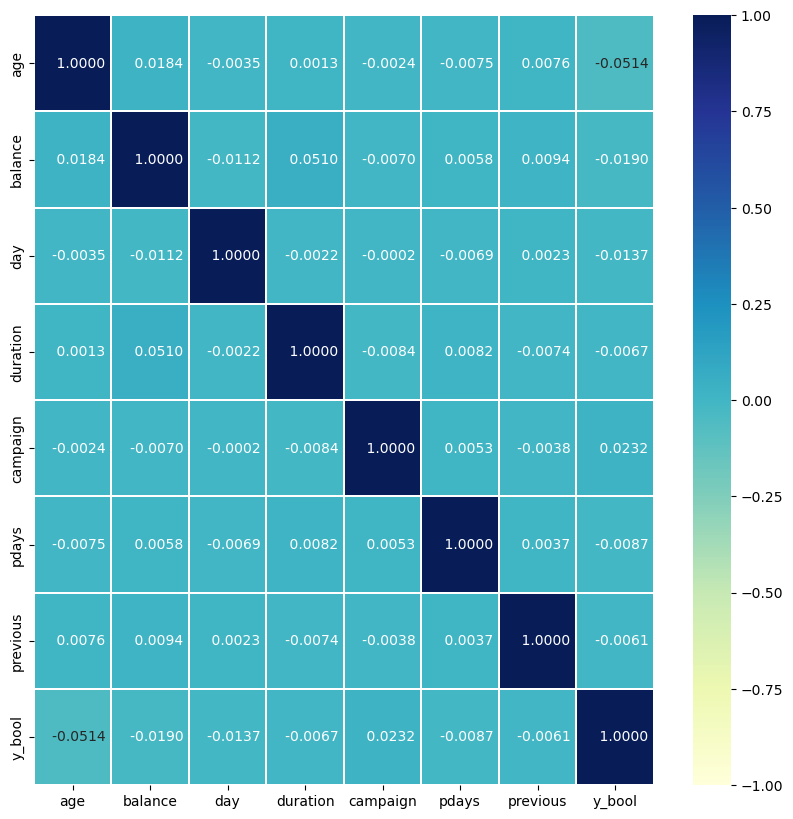

In [22]:
# set the plot size
fig,ax = plt.subplots(figsize=(10, 10))

# plot a heatmap for the correlation matrix
# annot: print values in each cell
# linewidths: specify width of the line specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# cmap: colour code of the plot
# fmt: set the decimal place of annot
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')

# display the plot
plt.show()

Data is not Highly correlated to each other

In [23]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0
2,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0
3,52,self-employed,single,tertiary,no,1887,yes,yes,unknown,19,jun,56,1,-1,0,unknown,1
4,22,admin.,single,secondary,no,2456,yes,yes,cellular,16,may,539,4,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,26,technician,married,secondary,no,289,no,no,cellular,8,jul,102,3,-1,0,unknown,1
18364,34,management,married,tertiary,no,122,yes,no,cellular,19,may,301,2,-1,0,unknown,0
18365,32,blue-collar,married,tertiary,yes,521,no,yes,telephone,2,oct,140,3,-1,0,unknown,0
18366,40,technician,married,secondary,no,2092,no,no,cellular,3,aug,7,2,-1,0,unknown,0


In [24]:
category = df[['job','marital','education','default','housing','loan','contact','month','poutcome']]

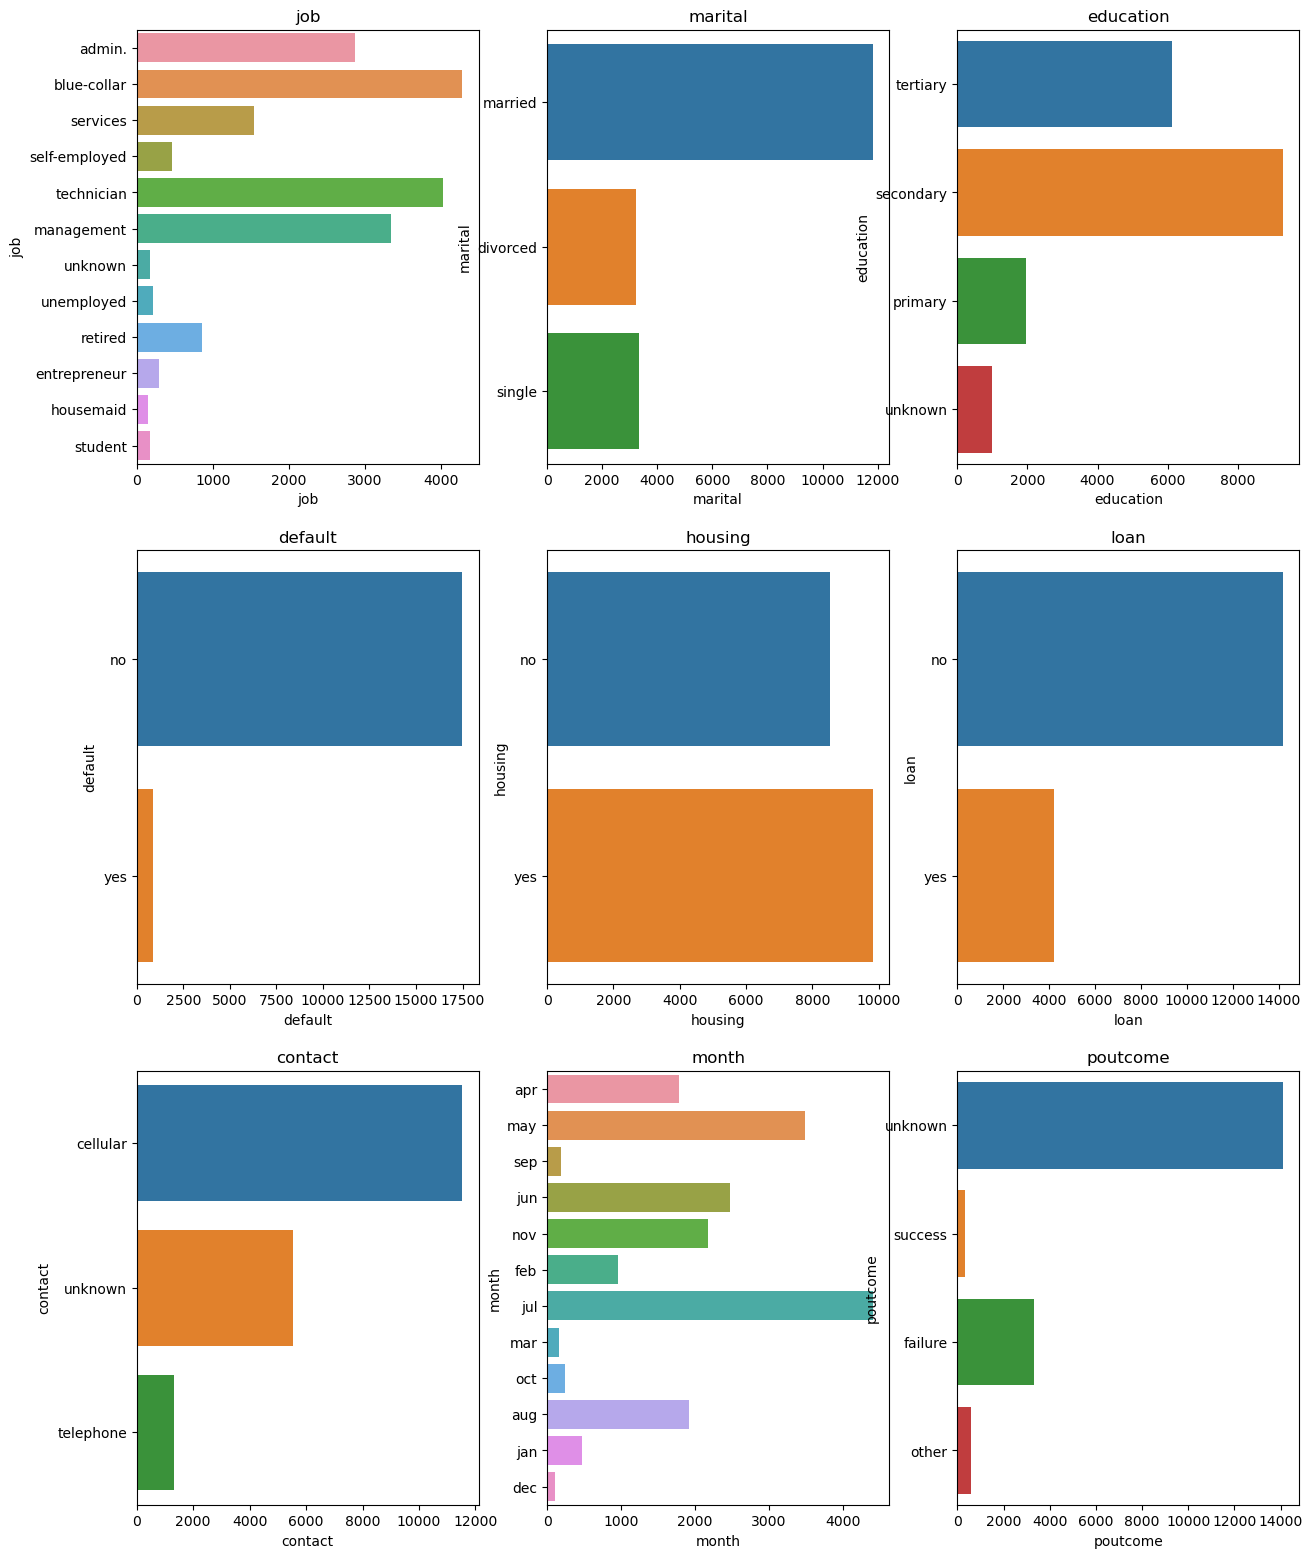

In [25]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in category:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Inferences : 
People with blue collar job, technician and management are more compared to others.<br>
People with tertiary and secondary education contacted are more.
Their are more married people.<br>
Majority of people are Non Defaulters.<br>
Number of people having Housing loan are more compared to personal Loan.<br>
Cellular contacts are more.<br>
Maximum people contacted are in month of july.<br>



### Relationship of Categorical Features with Label

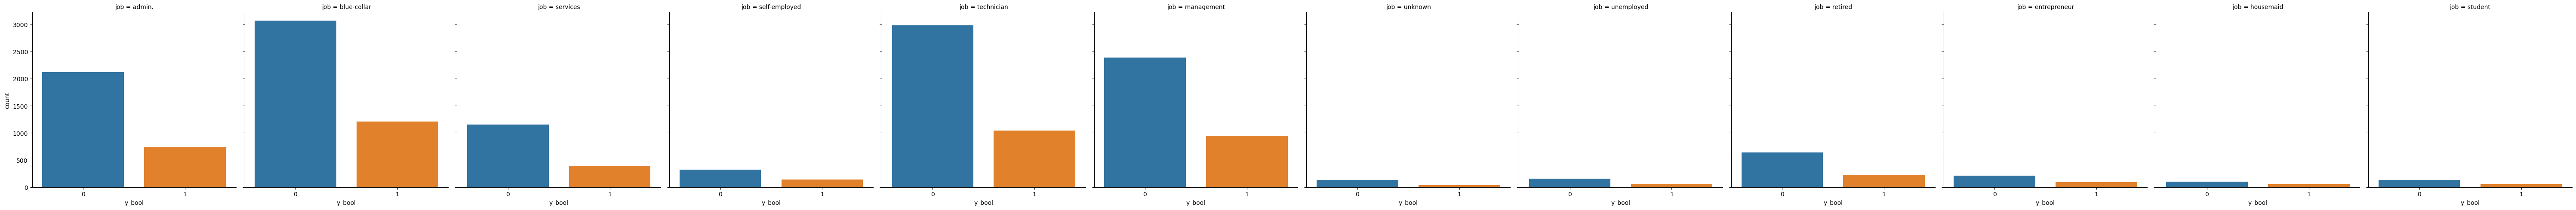

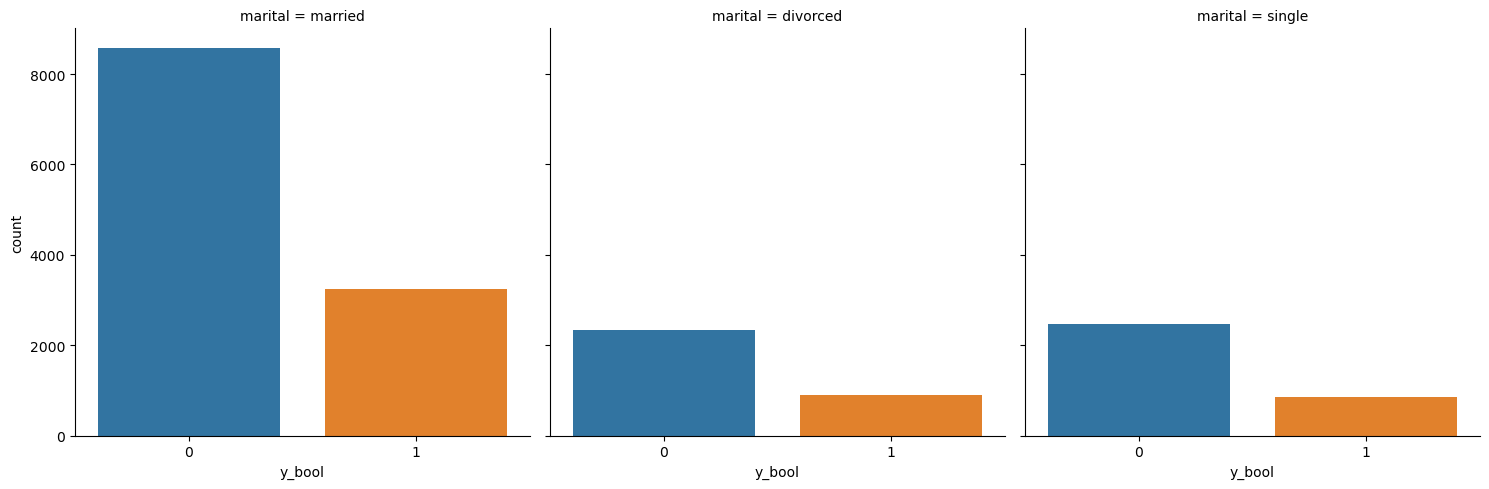

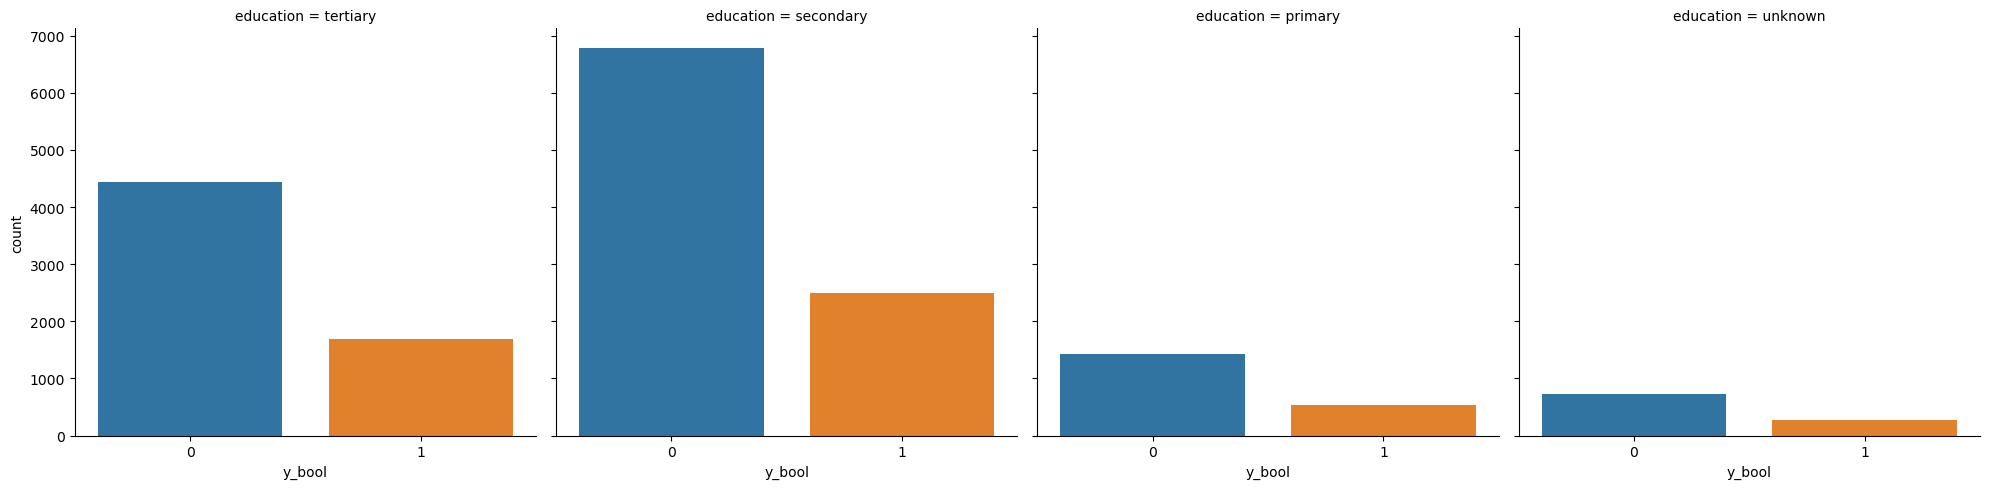

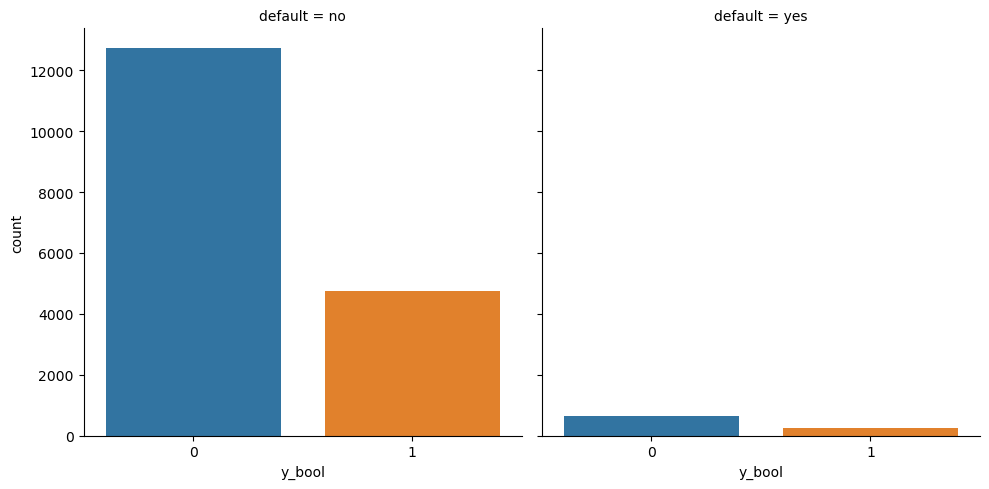

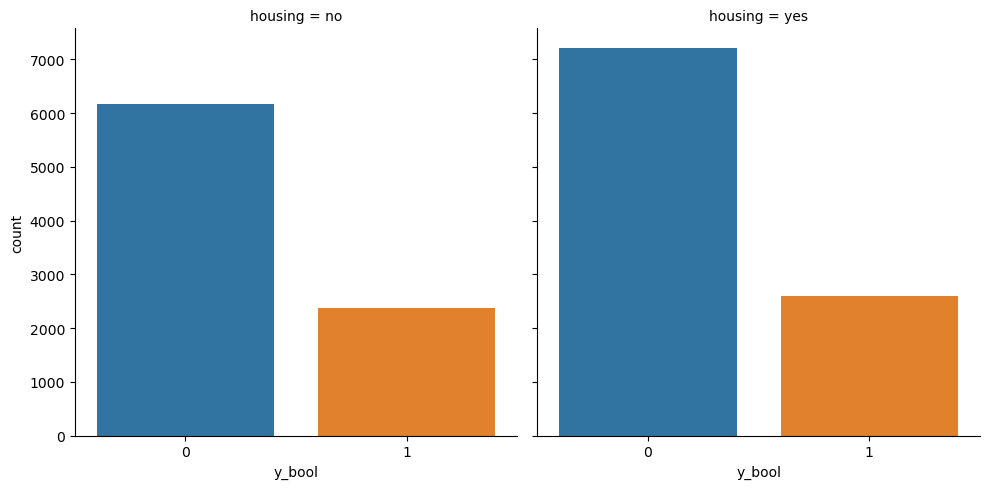

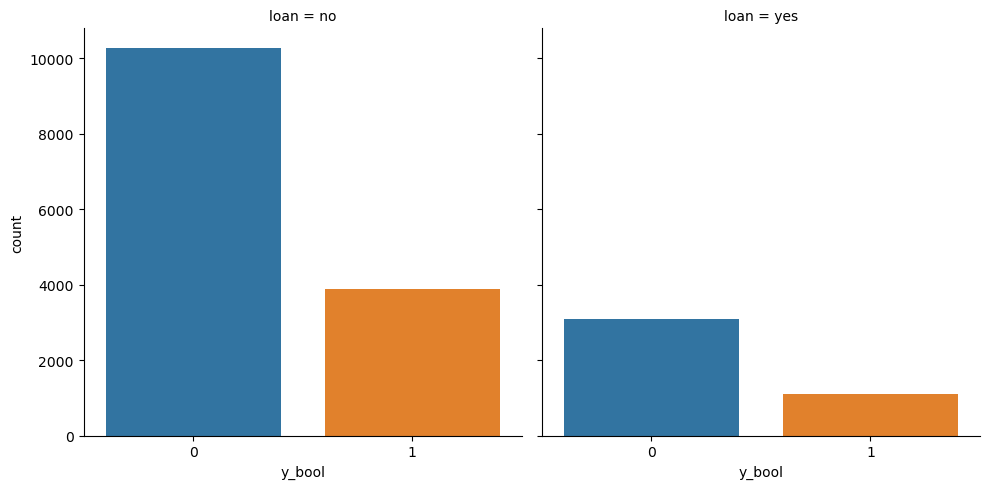

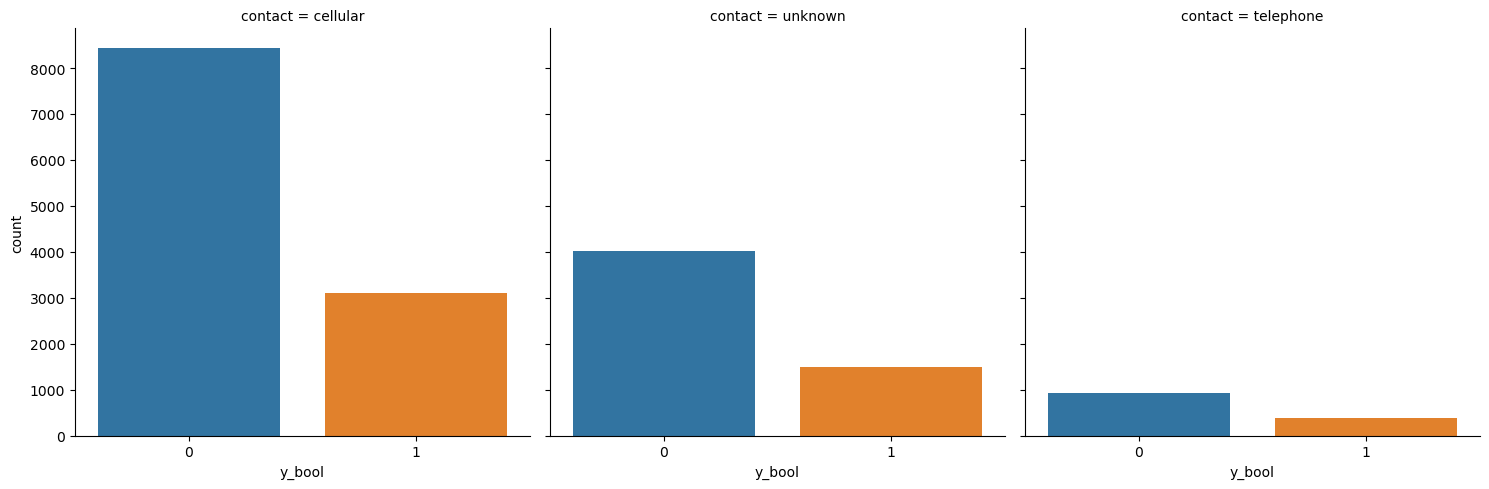

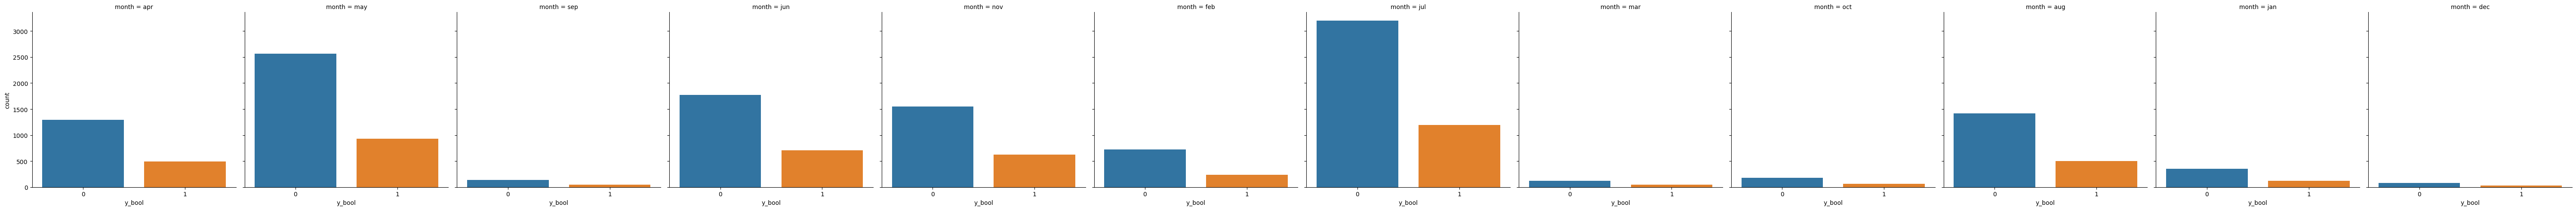

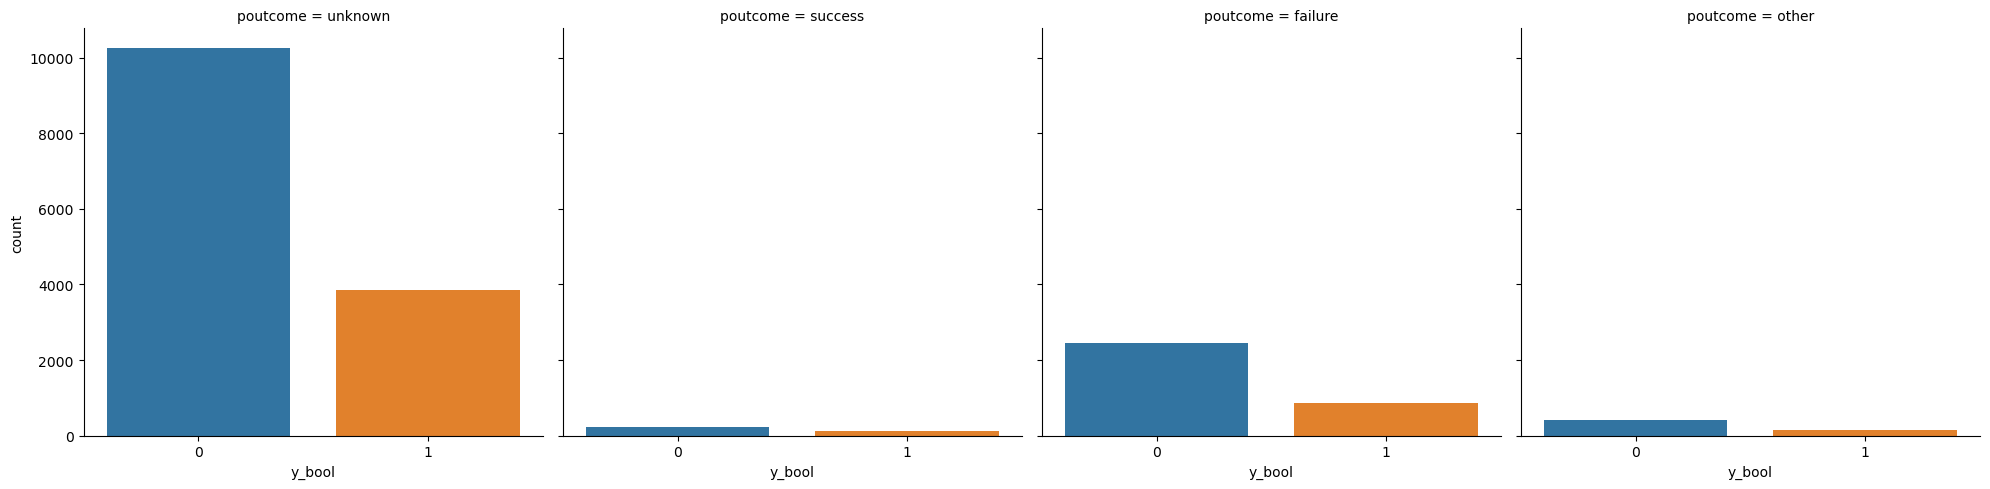

In [26]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in category:
    sns.catplot(x='y_bool', col=categorical_feature, kind='count', data= df)
plt.show()

### Inferences : 
Job: Highest Number of application are from Blue collar,Technician,management and admin type of job.<br>
Default:People who have no default have subscribed to plan.<br>
Marital: Majority client subscribed were married.<br>
Education: Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)<br>
Housing: Housing loan does not have much effect on the number of term deposit purchased.<br>
Loan: We approach majority around client with not having personal loan.<br>
Contact: Majority calls are from cellular.<br>
Month:  Majority people who have subscribed are from month may,june,july,nov.<br>
poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again<br>

In [27]:
df_num = df[['age','day','duration','balance','campaign','previous','pdays']]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

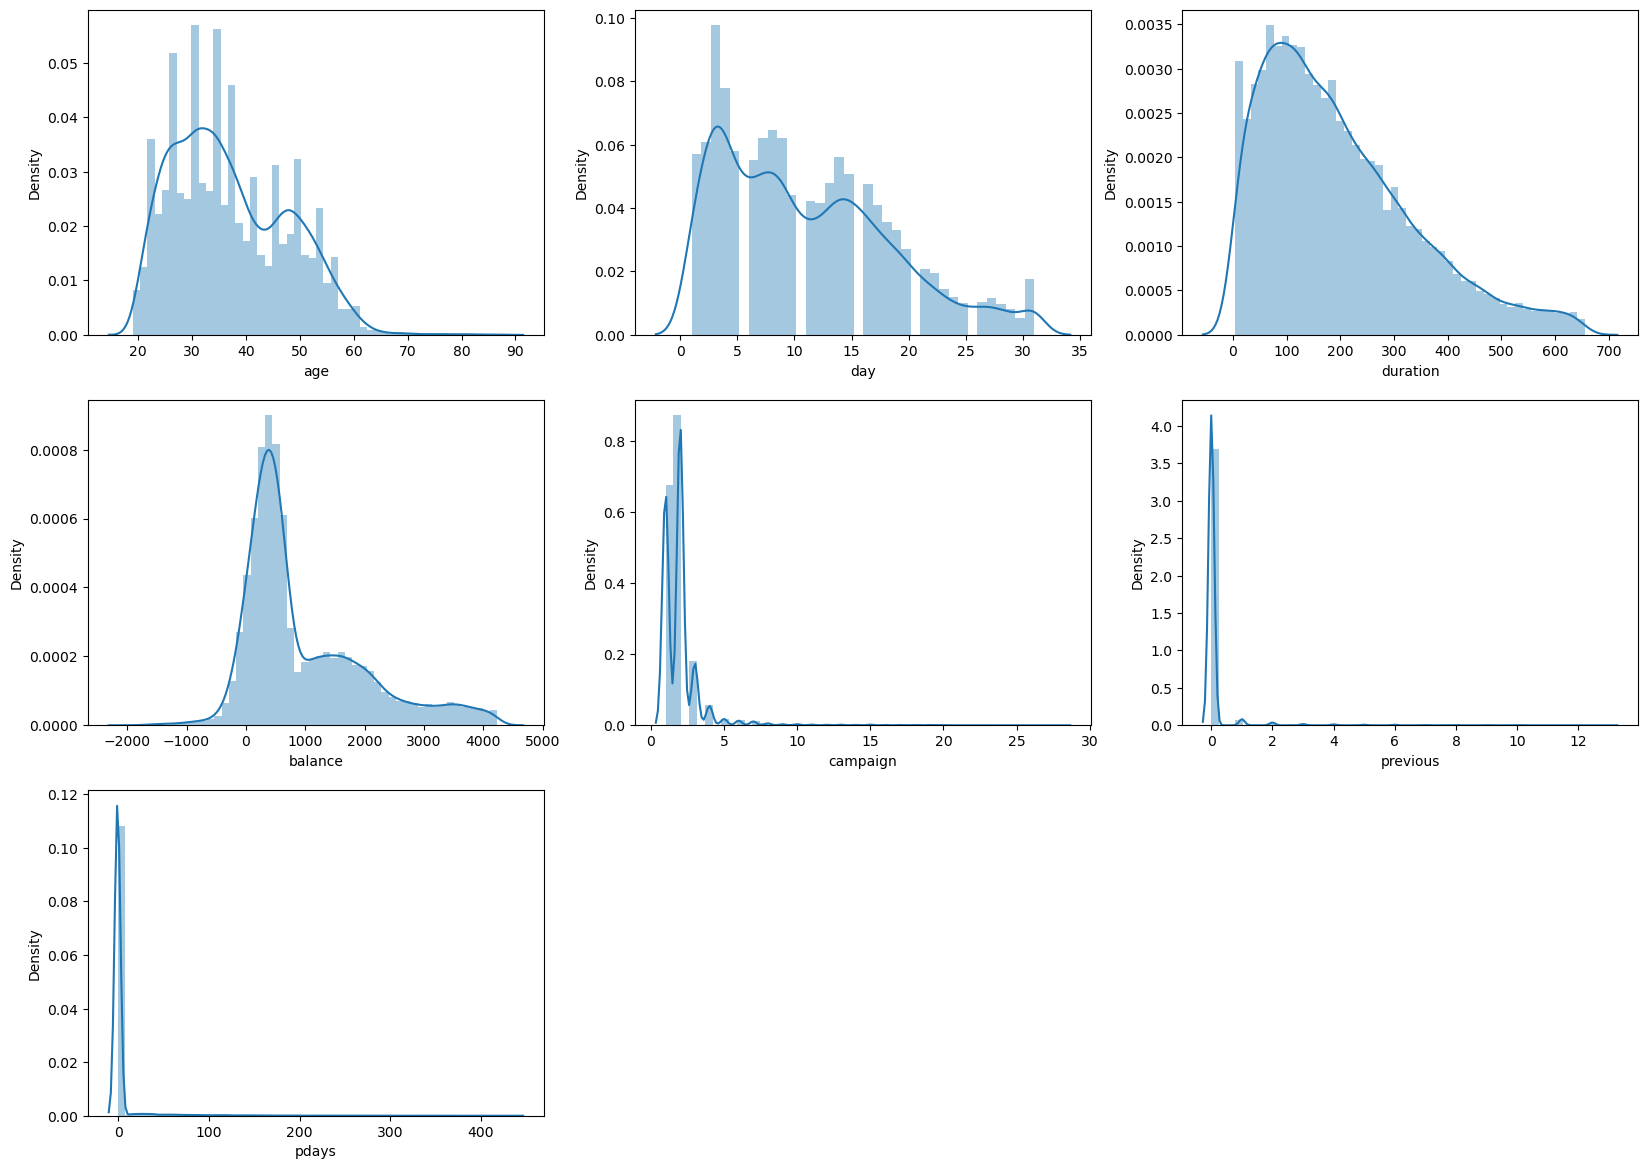

In [28]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in df_num:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

### Inference :
It seems age, days distributed normally<br>
balance, duration, compaign, pdays and previous heavely skewed towards Right and seems to be have some outliers.


### Relation between numerical and Label

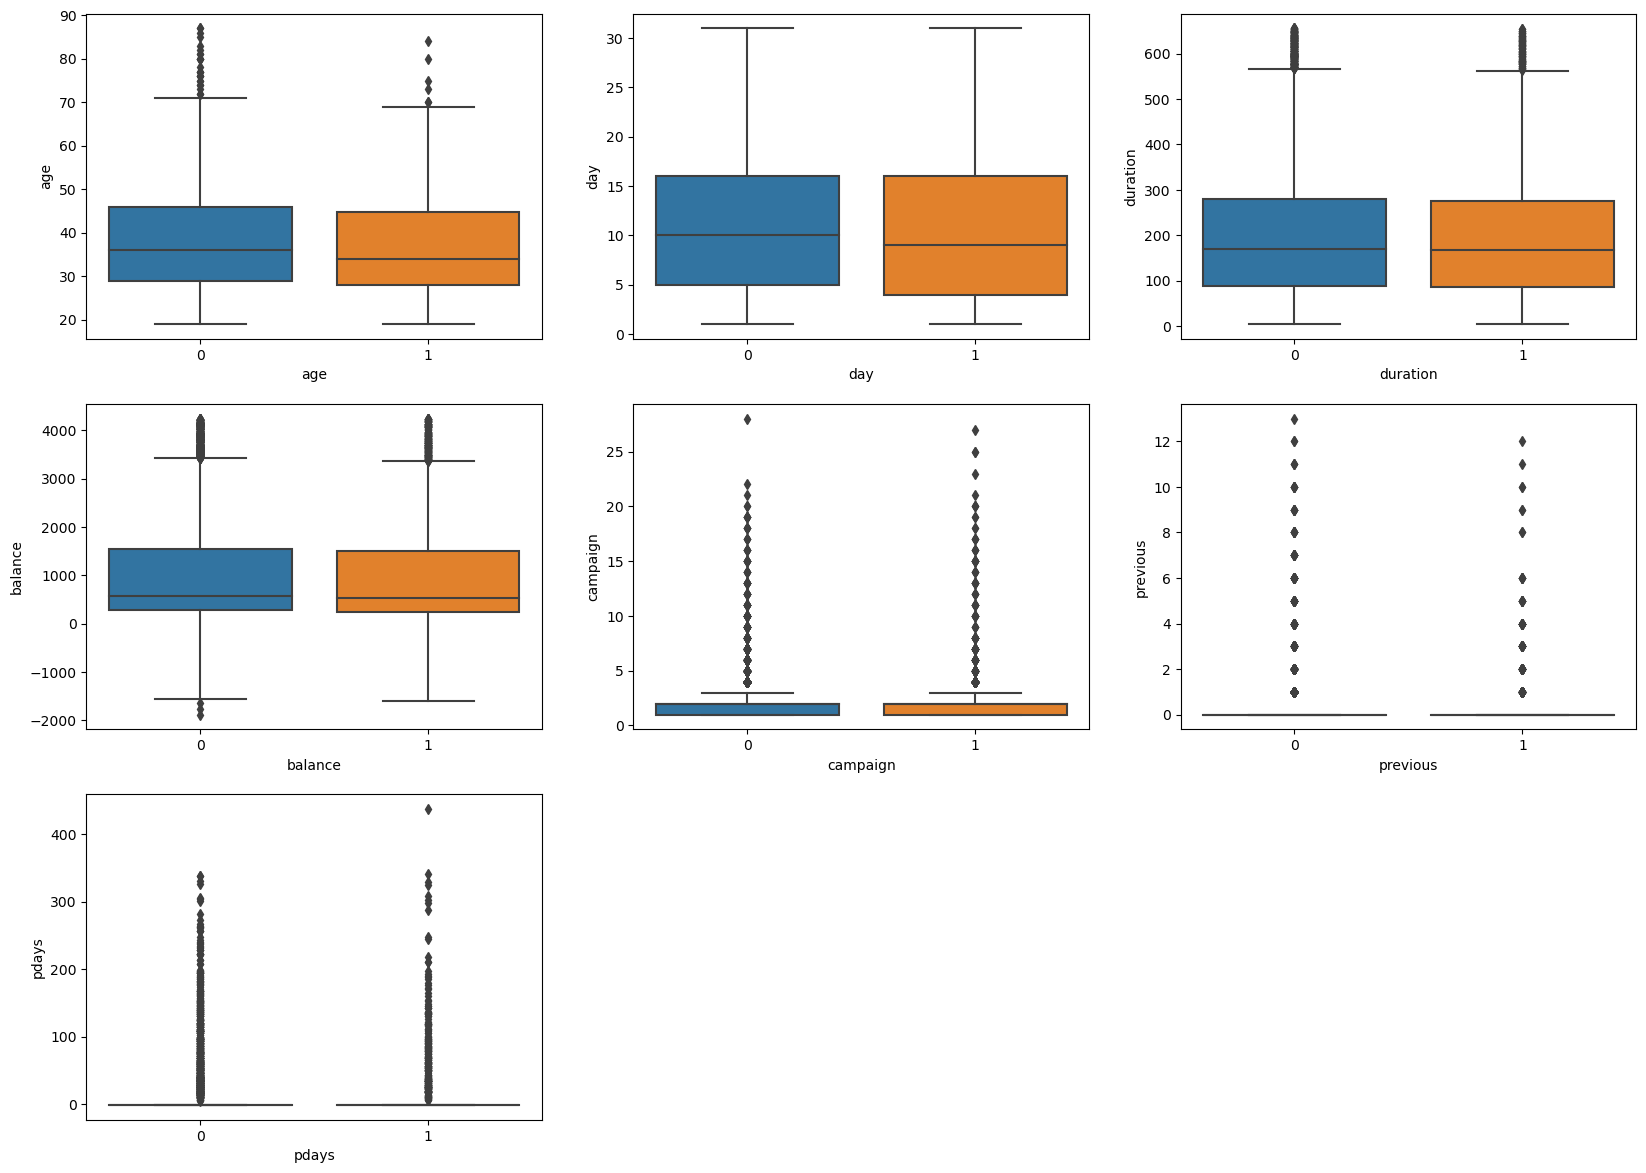

In [29]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in df_num:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y_bool", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [30]:
df['y_bool'].value_counts()

0    13382
1     4986
Name: y_bool, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y_bool', ylabel='count'>

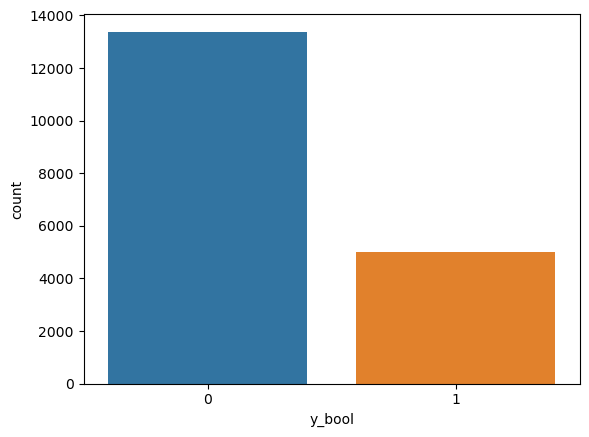

In [31]:
sns.countplot(df['y_bool'])

#### Observation :  Imbalanced dataset

### Age analysis

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


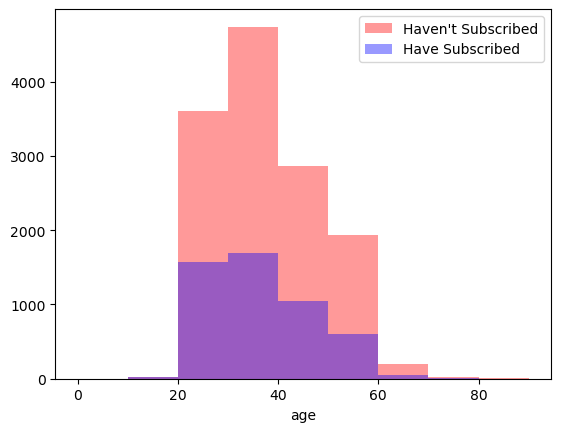

In [32]:
bins = range(0, 100, 10)
ax = sns.distplot(df.age[df.y_bool==0],
              color='red', kde=False, bins=bins, label="Haven't Subscribed")
sns.distplot(df.age[df.y_bool==1],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Have Subscribed")
plt.legend()
plt.show()

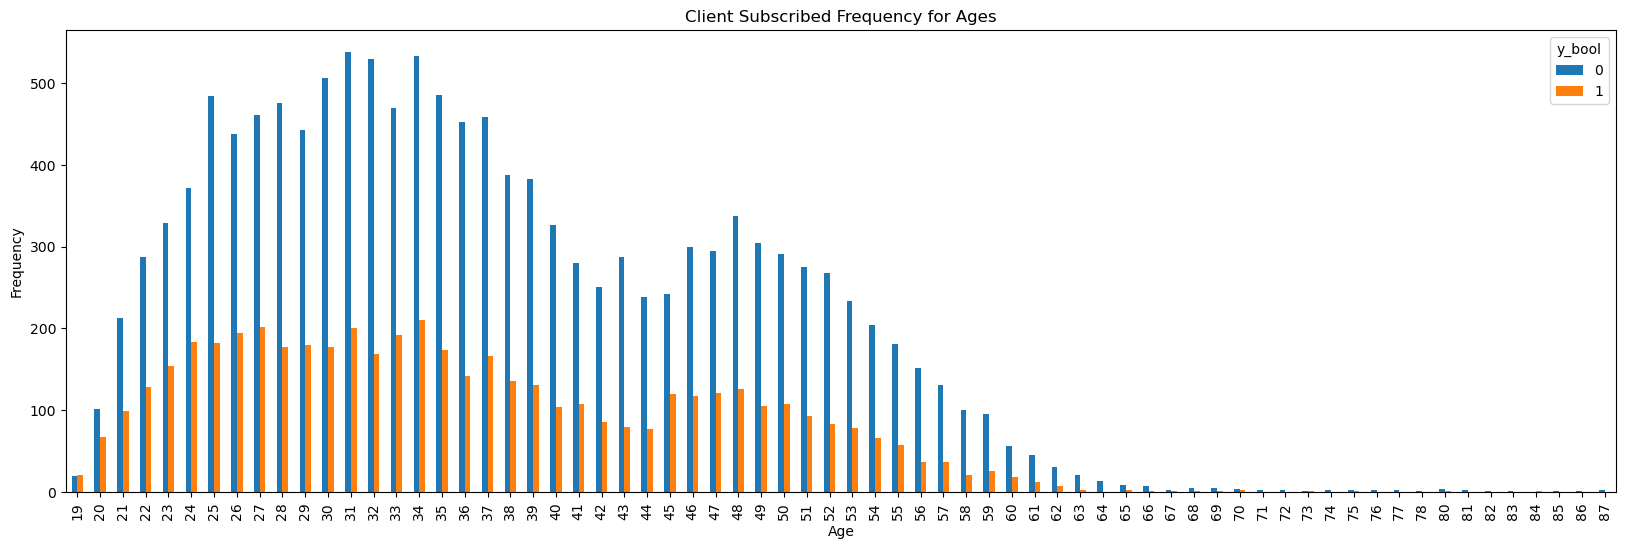

In [33]:
pd.crosstab(df.age,df.y_bool).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

People who have subscribed to plan are from age of 20-60.

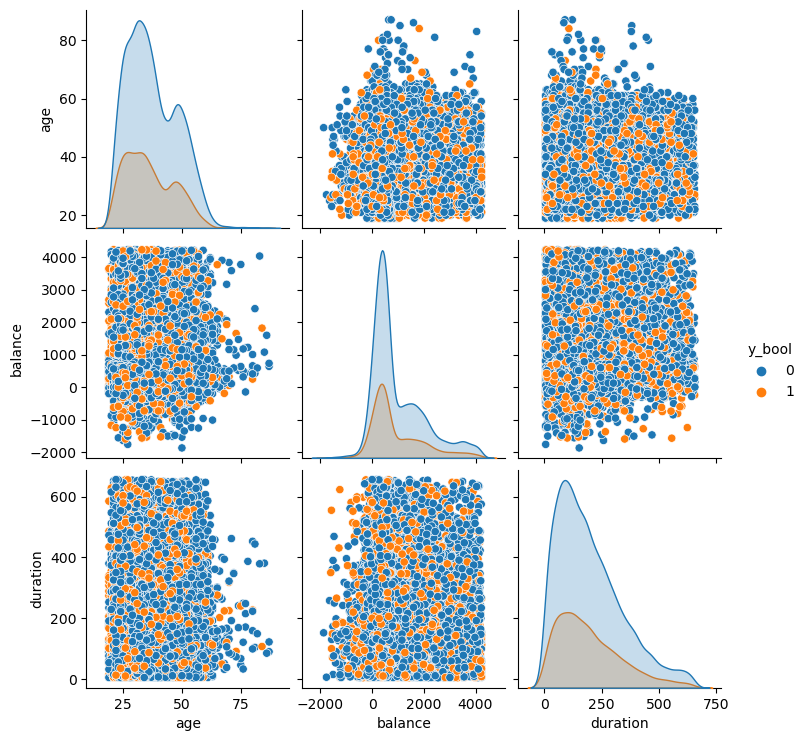

In [34]:
sns.pairplot(data=df, hue='y_bool', vars= ['age', 'balance', 'duration'])

## Encoding

In [35]:
df = pd.get_dummies(df, columns=['job','marital','default','housing','loan','contact','month','poutcome'], drop_first=True)

In [36]:
df

,age,education,balance,day,duration,campaign,pdays,previous,y_bool,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,51,tertiary,148,15,263,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,65,tertiary,2197,12,102,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,36,secondary,1761,19,177,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,52,tertiary,1887,19,56,1,-1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,22,secondary,2456,16,539,4,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,26,secondary,289,8,102,3,-1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
18364,34,tertiary,122,19,301,2,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18365,32,tertiary,521,2,140,3,-1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
18366,40,secondary,2092,3,7,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['education']= le.fit_transform(df['education'].values)

In [38]:
df

,age,education,balance,day,duration,campaign,pdays,previous,y_bool,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,51,2,148,15,263,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,65,2,2197,12,102,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,36,1,1761,19,177,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,52,2,1887,19,56,1,-1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,22,1,2456,16,539,4,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,26,1,289,8,102,3,-1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
18364,34,2,122,19,301,2,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18365,32,2,521,2,140,3,-1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
18366,40,1,2092,3,7,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Scaling Dataset

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
df[['age','day','duration','balance','campaign','previous','pdays']] = scaler.fit_transform(df[['age','day','duration','balance','campaign','previous','pdays']].to_numpy())

In [42]:
df

,age,education,balance,day,duration,campaign,pdays,previous,y_bool,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.470588,2,0.331099,0.466667,0.397239,0.037037,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.676471,2,0.666122,0.366667,0.150307,0.037037,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0.250000,1,0.594833,0.600000,0.265337,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.485294,2,0.615435,0.600000,0.079755,0.000000,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0.044118,1,0.708470,0.500000,0.820552,0.111111,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,0.102941,1,0.354153,0.233333,0.150307,0.074074,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,1
18364,0.220588,2,0.326848,0.600000,0.455521,0.037037,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
18365,0.191176,2,0.392086,0.033333,0.208589,0.074074,0.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0,1
18366,0.308824,1,0.648954,0.066667,0.004601,0.037037,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split


In [44]:
X = df.drop(['y_bool'],axis = 1)

In [45]:
X

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.470588,2,0.331099,0.466667,0.397239,0.037037,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.676471,2,0.666122,0.366667,0.150307,0.037037,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0.250000,1,0.594833,0.600000,0.265337,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.485294,2,0.615435,0.600000,0.079755,0.000000,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.044118,1,0.708470,0.500000,0.820552,0.111111,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,0.102941,1,0.354153,0.233333,0.150307,0.074074,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
18364,0.220588,2,0.326848,0.600000,0.455521,0.037037,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
18365,0.191176,2,0.392086,0.033333,0.208589,0.074074,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
18366,0.308824,1,0.648954,0.066667,0.004601,0.037037,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
y = df['y_bool']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3 , random_state = 42)

In [170]:
from sklearn.metrics import f1_score

## KNN 

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
Knn_model = KNeighborsClassifier(n_neighbors= 5)

In [173]:
Knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [174]:
knntrain_pred = Knn_model.predict(X_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [176]:
f1_score(y_train,knntrain_pred)

0.42924439419634447

In [177]:
# test data 
knntest_pred = Knn_model.predict(X_test)
f1_score(y_test,knntest_pred)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.19086757990867578

<AxesSubplot:>

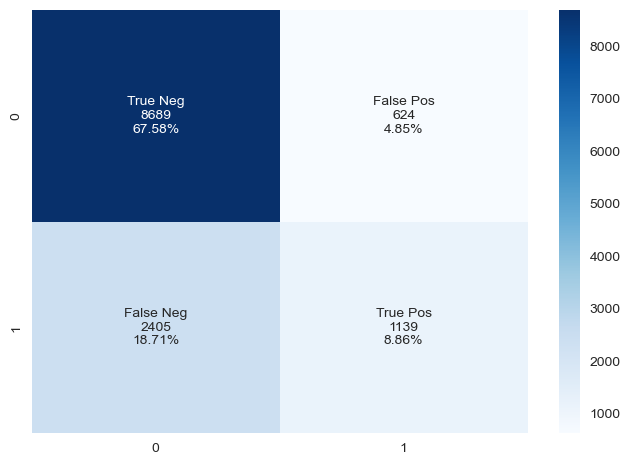

In [178]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train,knntrain_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

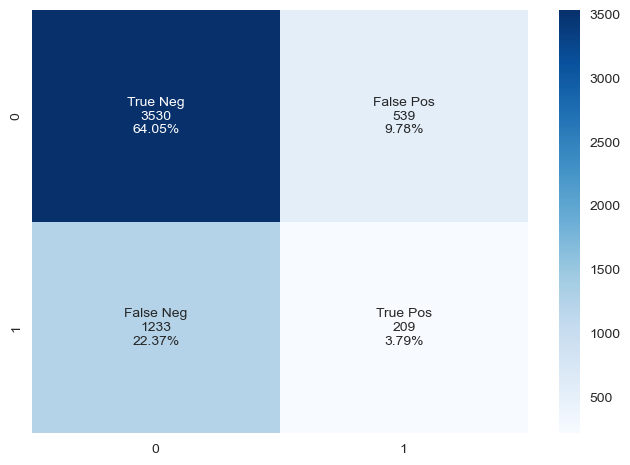

In [179]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,knntest_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression(C=1,class_weight={0:1,1:2.0})
modelLogistic.fit(X_train,y_train)
#print the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient are = ", modelLogistic.coef_)

The intercept b0=  [-0.05104888]
The coefficient are =  [[-7.59796264e-01 -7.52568076e-04 -6.53339232e-02 -9.76323072e-02
  -5.62538678e-02  8.74586532e-01 -2.78642142e-01 -2.19888894e-01
   1.22663202e-01  7.37153130e-02  3.07865594e-01  1.29387957e-01
   5.55316282e-03  3.07226031e-01 -1.84385818e-02  1.53178317e-01
   1.38343814e-03  1.85566328e-01 -7.41206938e-02  2.10733310e-03
  -7.55443574e-02 -1.44922256e-02 -8.38799756e-02 -4.32069538e-02
   1.37372984e-01  3.33269894e-02 -1.53883130e-01 -1.52672346e-01
  -1.75711251e-01 -9.66404336e-02  1.16690027e-02  6.98747711e-02
  -1.91429400e-01 -9.59041670e-02  5.27064453e-02 -1.74795488e-01
  -1.45902006e-01  6.91953285e-02  2.15476927e-01  4.43794822e-02]]


In [181]:
y_pred_train= modelLogistic.predict(X_train)


In [182]:
y_pred_test= modelLogistic.predict(X_test)


In [183]:
y_pred_train.shape

(12857,)

In [184]:
y_pred_test.shape

(5511,)

In [185]:
f1_score(y_train,y_pred_train)

0.1284320399364647

In [186]:
f1_score(y_test,y_pred_test)

0.11945205479452053

<AxesSubplot:>

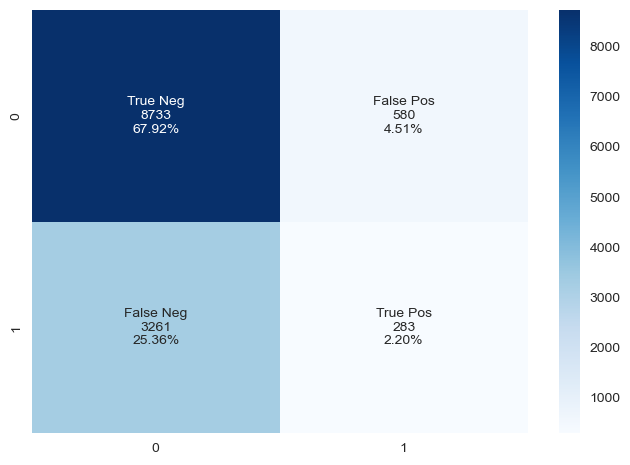

In [187]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train,y_pred_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

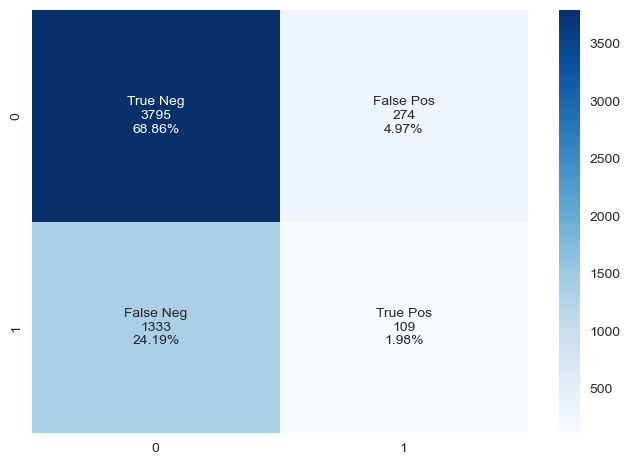

In [188]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Decision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
dt = DecisionTreeClassifier(max_depth=20,class_weight= {0:1,1:2.2})
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2.2}, max_depth=20)

In [191]:
preddt_train = dt.predict(X_train)

In [192]:
preddt_test = dt.predict(X_test)

In [193]:
f1_score(y_train,preddt_train)

0.8476784476784477

In [194]:
f1(y_test,preddt_test)

0.2822902796271638

<AxesSubplot:>

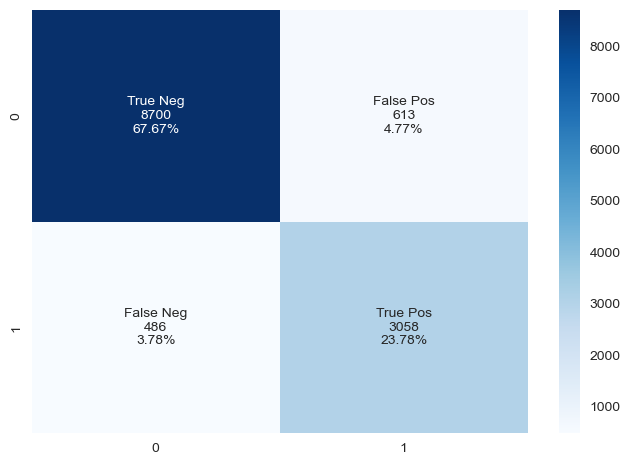

In [195]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train,preddt_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

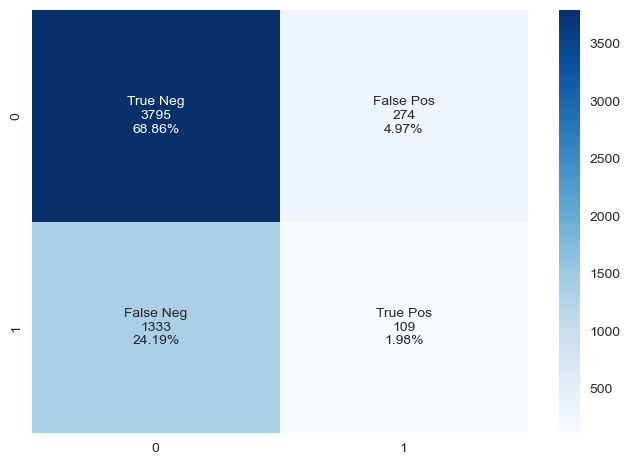

In [196]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [197]:
 from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, knntest_pred)
auc_score2 = roc_auc_score(y_test, y_pred_test)
auc_score3 = roc_auc_score(y_test, preddt_test)

print(auc_score1, auc_score2,auc_score3)

0.5062363037874065 0.5041255233491345 0.5071802325284133


In [198]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, knntest_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_test, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, preddt_test, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

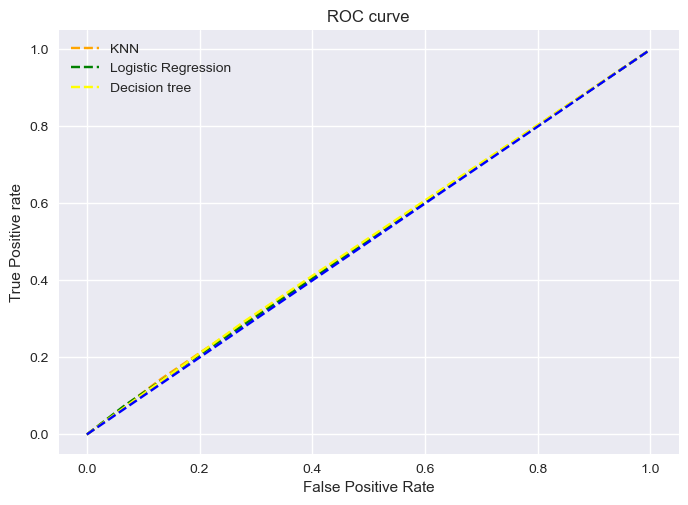

In [199]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Decision tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Cross Validation Logistic

In [209]:
from sklearn.model_selection import cross_val_score
import numpy as np



# Create logistic regression model
logreg = LogisticRegression(C=1,class_weight={0:1,1:1.1})

# Perform cross-validation on the training data
scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)

# Print the F1 scores for each fold in the training data
print("Training F1 Scores:", scores)

# Print the mean F1 score and standard deviation of the training data
print("Mean Training F1 Score:", scores.mean())
print("Training Standard Deviation:", scores.std())

# Train the logistic regression model on the entire training data
logreg.fit(X_train, y_train)

# Evaluate the model on the test data
test_f1_score = logreg.score(X_test, y_test)
print("Test F1 Score:", test_f1_score)
cv_logtest = logreg.predict(X_test)
print(cv_logtest)

Training F1 Scores: [0.         0.         0.         0.         0.00280505]
Mean Training F1 Score: 0.0005610098176718093
Training Standard Deviation: 0.0011220196353436186
Test F1 Score: 0.7383414988205408
[0 0 0 ... 0 0 0]


In [211]:
auc_score4 = roc_auc_score(y_test,cv_logtest)
print(auc_score4)

0.5


# Cross Validation Decision tree

In [226]:
# Create decision tree classifier
dt2 = DecisionTreeClassifier(max_depth=25,class_weight= {0:1,1:2.2})

# Perform cross-validation on the training data
cv_scores = cross_val_score(dt2, X_train, y_train, scoring='f1', cv=15)

# Print the F1 scores for each fold in the training data
print("Training F1 Scores:", cv_scores)

# Print the mean F1 score and standard deviation of the training data
print("Mean Training F1 Score:", cv_scores.mean())
print("Training Standard Deviation:", cv_scores.std())

# Train the decision tree on the entire training data
dt2.fit(X_train, y_train)

# Evaluate the model on the test data
test_f1_score = dt.score(X_test, y_test)
print("Test F1 Score:", test_f1_score)

Training F1 Scores: [0.36893204 0.34747475 0.32860041 0.31919192 0.32635983 0.38888889
 0.34136546 0.2993763  0.28857715 0.30020284 0.26751592 0.3035343
 0.30555556 0.29299363 0.33203125]
Mean Training F1 Score: 0.3207066834149926
Training Standard Deviation: 0.030953770648714525
Test F1 Score: 0.6087824351297405


### Feature selection with Logistic

In [228]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [240]:
model1 = LogisticRegression()
# Create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(estimator=model1, k_features='best', forward=True, verbose=2, scoring='f1')

In [245]:
X.columns

Index(['age', 'education', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [246]:
feature_names = ['age', 'education', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']

In [247]:
feature_names

['age',
 'education',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [250]:
# Perform feature selection
sfs.fit(X, y)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Transform the training and testing data to keep only the selected features
X_train_selected = sfs.transform(X)
X_test_selected = sfs.transform(X)

# Train a linear regression model on the selected features
model1.fit(X_train_selected, y)

# Evaluate the model on the testing data
score = model1.score(X_test_selected, y)

# Print the selected features and the model score
print("Selected Features:", selected_feature_names)
print("Model Score:", score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.2s finished

[2023-06-19 23:07:20] Features: 1/40 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    5.4s finished

[2023-06-19 23:07:25] Features: 2/40 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    6.5s finished

[2023-06-19 23:07:32] Features: 3/40 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   10.2s finished

[2023-06-19 23:12:45] Features: 29/40 -- score: 0.0004008016032064129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   11.0s finished

[2023-06-19 23:12:56] Features: 30/40 -- score: 0.0004008016032064129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.0s finished

[2023-06-19 23:13:03] Features: 31/40 -- score: 0.0004008016032064129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=

Selected Features: ['age', 'education', 'balance', 'day', 'duration', 'campaign', 'job_entrepreneur']
Model Score: 0.7285496515679443


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished

[2023-06-19 23:13:45] Features: 40/40 -- score: 0.0

In [254]:
model2 = DecisionTreeClassifier(max_depth=15)
sfs2 = SequentialFeatureSelector(estimator=model2, k_features='best', forward=True, verbose=2, scoring='f1')

In [255]:
# Perform feature selection
sfs2.fit(X, y)

# Get the selected feature indices
selected_feature_indices = sfs2.k_feature_idx_

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Transform the training and testing data to keep only the selected features
X_train_selected = sfs2.transform(X)
X_test_selected = sfs2.transform(X)

# Train a linear regression model on the selected features
model2.fit(X_train_selected, y)

# Evaluate the model on the testing data
score1 = model2.score(X_test_selected, y)

# Print the selected features and the model score
print("Selected Features:", selected_feature_names)
print("Model Score:", score1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished

[2023-06-19 23:31:15] Features: 1/40 -- score: 0.046361415533595456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    5.9s finished

[2023-06-19 23:31:21] Features: 2/40 -- score: 0.11754010293959119[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    7.1s finished

[2023-06-19 23:31:28] Features: 3/40 -- score: 0.13822299267124993[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    5.7s finished

[2023-06-19 23:34:55] Features: 28/40 -- score: 0.18132714309228815[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.4s finished

[2023-06-19 23:35:01] Features: 29/40 -- score: 0.18196478974183566[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    6.0s finished

[2023-06-19 23:35:07] Features: 30/40 -- score: 0.1834414632257877[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.5s finished

[2023-06-19 23:35:13] Features: 3

Selected Features: ['age', 'balance', 'day', 'duration', 'campaign', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_retired', 'job_services', 'job_technician', 'job_unknown', 'marital_married', 'marital_single', 'default_yes', 'housing_yes', 'loan_yes', 'contact_unknown', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_unknown']
Model Score: 0.8138066202090593


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished

[2023-06-19 23:35:42] Features: 40/40 -- score: 0.15484523834623118